<a href="https://colab.research.google.com/github/chernoskutov1989dv/LLMmetrics/blob/main/%22%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D1%8D%D1%84%D1%84%D0%B5%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%BA%D0%B8_ROUGE_%D0%B4%D0%BB%D1%8F_%D0%BF%D1%80%D0%B8%D0%BA%D0%BB%D0%B0%D0%B4%D0%BD%D1%8B%D1%85_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87_%D1%86%D0%B8%D1%84%D1%80%D0%BE%D0%B2%D1%8B%D1%85_%D0%B0%D1%81%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BD%D1%82%D0%BE%D0%B2%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook regroups the code sample of the video below, which is a part of the [Hugging Face course](https://huggingface.co/course).

In [ ]:
#@title
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/TMshhnrEXlg?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Install the Transformers and Datasets libraries to run this notebook.

In [ ]:
! pip install datasets transformers[sentencepiece]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.0 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
! pip install nltk rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=9d29598252ab803d2fad2c8b32e2f00e51539995c478a3d455e8ecdb85862727
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


ROUGE расшифровывается как Recall-Oriented Understudy for Gisting Evaluation. Это набор метрик, используемых для оценки качества автоматического суммирования и машинного перевода, основанный на сравнении с эталонными текстами. Основные метрики ROUGE включают ROUGE-N (для n-грамм), ROUGE-L (для длинных последовательностей) и ROUGE-W (взвешенные метрики).

Краткая справка по метрике ROUGE

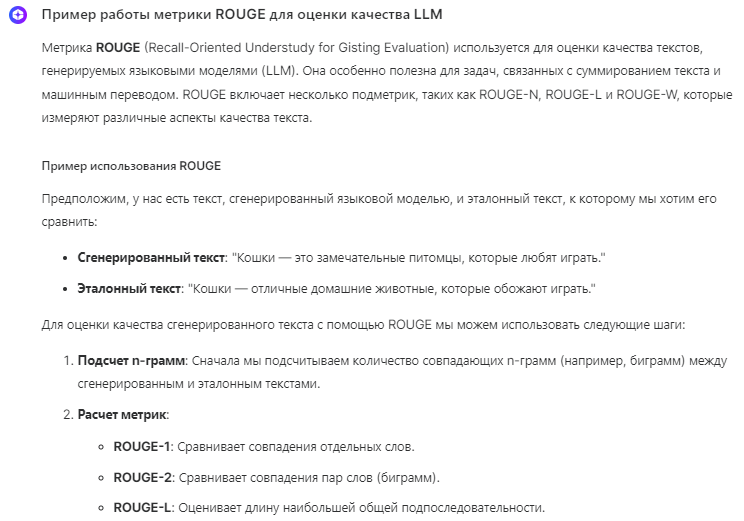

https://github.com/dmitrymailk/text_evaluation

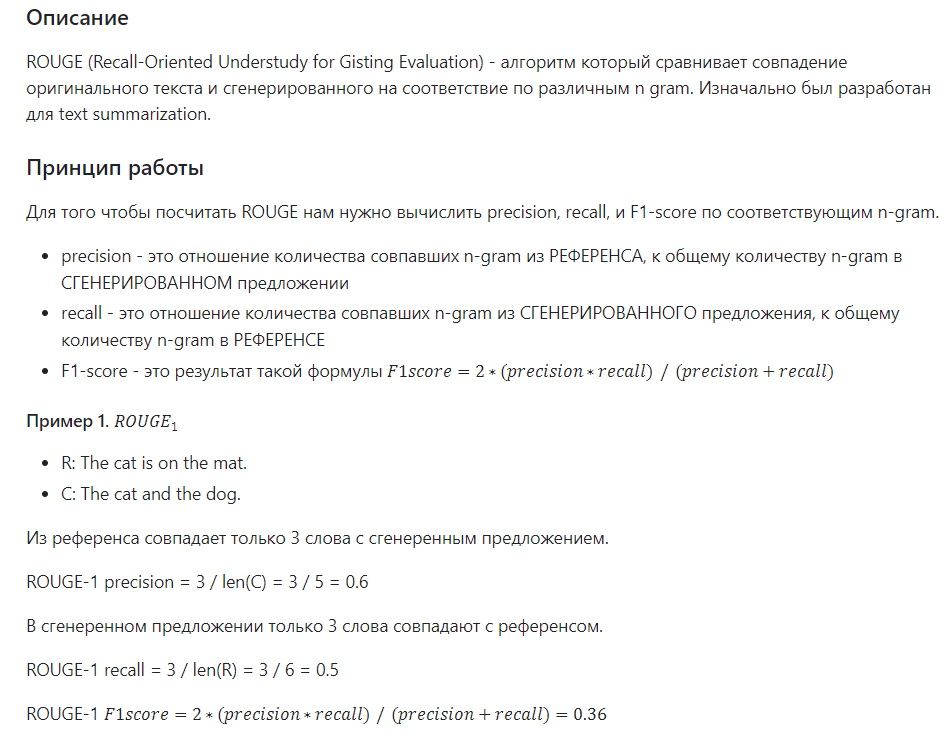

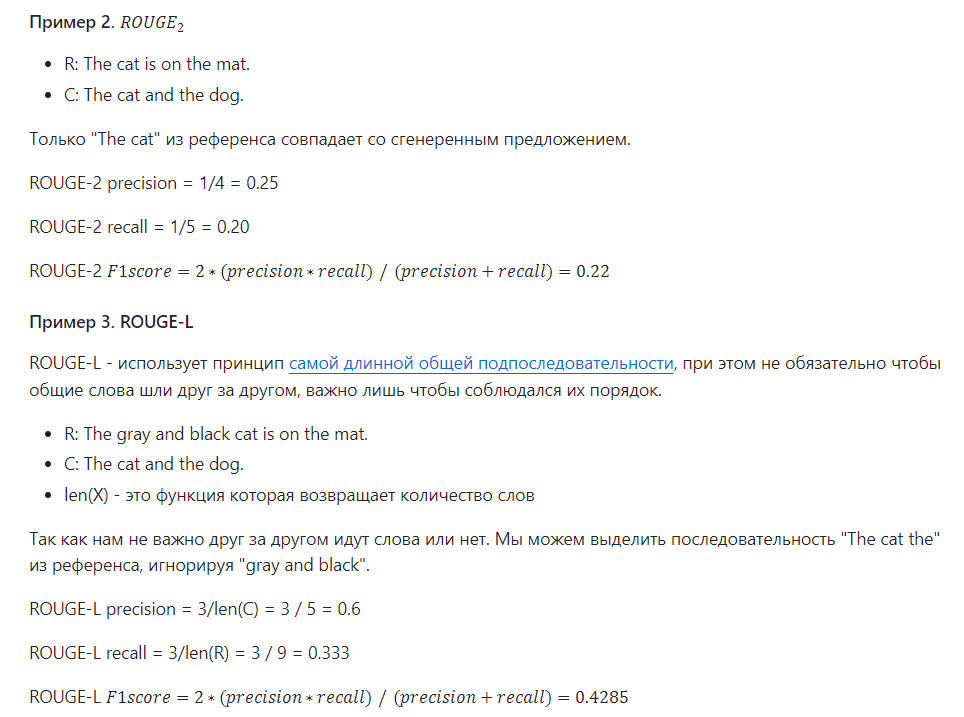

ROUGE для фраз на англййском языке:

In [ ]:
from datasets import load_metric

rouge = load_metric("rouge")
predictions = ["I really loved reading the Hunger Games"]
references = ["I loved reading the Hunger Games"]
rouge.compute(predictions=predictions, references=references)

ImportError: cannot import name 'load_metric' from 'datasets' (/usr/local/lib/python3.10/dist-packages/datasets/__init__.py)

Метрики в случае совпадения предсказанного ответа с эталонным ответом.

In [ ]:
from datasets import load_metric

rouge = load_metric("rouge")
predictions = ["I loved reading the Hunger Games"]
references = ["I loved reading the Hunger Games"]
rouge.compute(predictions=predictions, references=references)

ImportError: cannot import name 'load_metric' from 'datasets' (/usr/local/lib/python3.10/dist-packages/datasets/__init__.py)

Видим, что метрики 100%

Вопрос из золотой разметки по Datapk-itm. Почему происходит перезапуск контейнера itm_m_siem_connector? *Для первичной проверки гипотезы применимости и эффективности ROUGE этот вопрос переведен на английский язык и расчитаем метрики ROUGE.

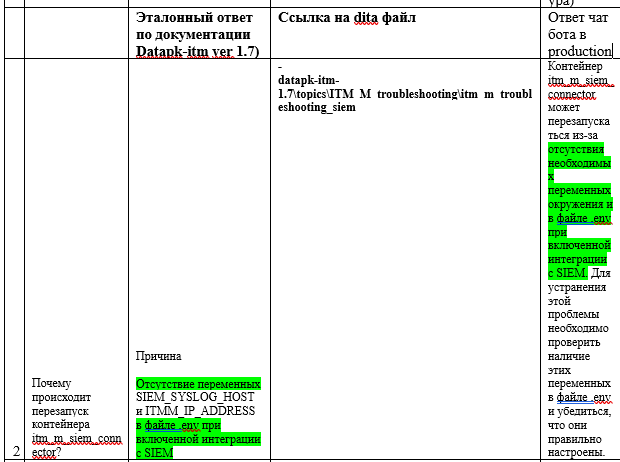

predictions - это ответ чат бота. References - это эталонный ответ по документации.

In [ ]:
from datasets import load_metric
rouge = load_metric("rouge")
predictions = ["Reason: Missing SIEM_SYSLOG_HOST and ITMM_IP_ADDRESS variables in the .env file when SIEM integration is enabled"]
references = ["The itm_m_siem_connector container may restart due to missing required environment variables in the .env file when SIEM integration is enabled. To resolve this issue, you need to check for the presence of these variables in the .env file and ensure that they are configured correctly."]

rouge.compute(predictions=predictions, references=references)

{'rouge1': AggregateScore(low=Score(precision=0.6842105263157895, recall=0.2708333333333333, fmeasure=0.38805970149253727), mid=Score(precision=0.6842105263157895, recall=0.2708333333333333, fmeasure=0.38805970149253727), high=Score(precision=0.6842105263157895, recall=0.2708333333333333, fmeasure=0.38805970149253727)),
 'rouge2': AggregateScore(low=Score(precision=0.5, recall=0.19148936170212766, fmeasure=0.27692307692307694), mid=Score(precision=0.5, recall=0.19148936170212766, fmeasure=0.27692307692307694), high=Score(precision=0.5, recall=0.19148936170212766, fmeasure=0.27692307692307694)),
 'rougeL': AggregateScore(low=Score(precision=0.5789473684210527, recall=0.22916666666666666, fmeasure=0.3283582089552239), mid=Score(precision=0.5789473684210527, recall=0.22916666666666666, fmeasure=0.3283582089552239), high=Score(precision=0.5789473684210527, recall=0.22916666666666666, fmeasure=0.3283582089552239)),
 'rougeLsum': AggregateScore(low=Score(precision=0.5789473684210527, recall=

2 вариант - если ответ будет более лаконичнее и приблиижен к эталонному, но не идеален

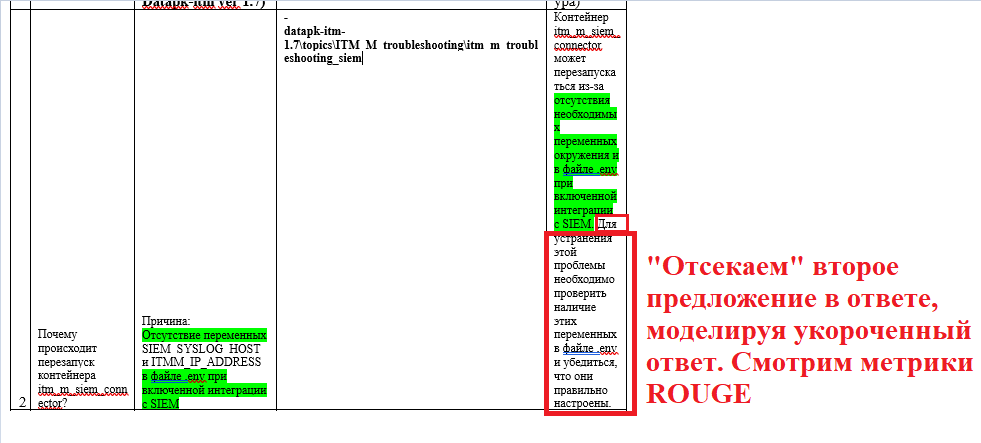

In [ ]:
from datasets import load_metric
rouge = load_metric("rouge")
predictions = ["The itm_m_siem_connector container may restart due to missing required environment variables in the .env file when SIEM integration is enabled."]
references = ["Reason: Missing SIEM_SYSLOG_HOST and ITMM_IP_ADDRESS variables in the .env file when SIEM integration is enabled"]

rouge.compute(predictions=predictions, references=references)

{'rouge1': AggregateScore(low=Score(precision=0.5217391304347826, recall=0.631578947368421, fmeasure=0.5714285714285715), mid=Score(precision=0.5217391304347826, recall=0.631578947368421, fmeasure=0.5714285714285715), high=Score(precision=0.5217391304347826, recall=0.631578947368421, fmeasure=0.5714285714285715)),
 'rouge2': AggregateScore(low=Score(precision=0.4090909090909091, recall=0.5, fmeasure=0.45), mid=Score(precision=0.4090909090909091, recall=0.5, fmeasure=0.45), high=Score(precision=0.4090909090909091, recall=0.5, fmeasure=0.45)),
 'rougeL': AggregateScore(low=Score(precision=0.4782608695652174, recall=0.5789473684210527, fmeasure=0.5238095238095238), mid=Score(precision=0.4782608695652174, recall=0.5789473684210527, fmeasure=0.5238095238095238), high=Score(precision=0.4782608695652174, recall=0.5789473684210527, fmeasure=0.5238095238095238)),
 'rougeLsum': AggregateScore(low=Score(precision=0.4782608695652174, recall=0.5789473684210527, fmeasure=0.5238095238095238), mid=Sco

Третий вариант ответа, когда ответ чат бота на 100% совпадает с эталонным

In [ ]:
from datasets import load_metric
rouge = load_metric("rouge")
predictions = ["Reason: Missing SIEM_SYSLOG_HOST and ITMM_IP_ADDRESS variables in the .env file when SIEM integration is enabled"]
references = ["Reason: Missing SIEM_SYSLOG_HOST and ITMM_IP_ADDRESS variables in the .env file when SIEM integration is enabled"]

rouge.compute(predictions=predictions, references=references)

{'rouge1': AggregateScore(low=Score(precision=1.0, recall=1.0, fmeasure=1.0), mid=Score(precision=1.0, recall=1.0, fmeasure=1.0), high=Score(precision=1.0, recall=1.0, fmeasure=1.0)),
 'rouge2': AggregateScore(low=Score(precision=1.0, recall=1.0, fmeasure=1.0), mid=Score(precision=1.0, recall=1.0, fmeasure=1.0), high=Score(precision=1.0, recall=1.0, fmeasure=1.0)),
 'rougeL': AggregateScore(low=Score(precision=1.0, recall=1.0, fmeasure=1.0), mid=Score(precision=1.0, recall=1.0, fmeasure=1.0), high=Score(precision=1.0, recall=1.0, fmeasure=1.0)),
 'rougeLsum': AggregateScore(low=Score(precision=1.0, recall=1.0, fmeasure=1.0), mid=Score(precision=1.0, recall=1.0, fmeasure=1.0), high=Score(precision=1.0, recall=1.0, fmeasure=1.0))}

Четвертый вариант ответа, когда ответ чат бота ВООБЩЕ НЕ СОВПАДАЕТ С ЭТАЛОННЫМ (ОТВЕТ-БРЕД)

In [ ]:
from datasets import load_metric
rouge = load_metric("rouge")
predictions = ["Because you forgot to turn off the iron and burned down the apartment"]
references = ["Reason: Missing SIEM_SYSLOG_HOST and ITMM_IP_ADDRESS variables in the .env file when SIEM integration is enabled"]

rouge.compute(predictions=predictions, references=references)

{'rouge1': AggregateScore(low=Score(precision=0.15384615384615385, recall=0.10526315789473684, fmeasure=0.125), mid=Score(precision=0.15384615384615385, recall=0.10526315789473684, fmeasure=0.125), high=Score(precision=0.15384615384615385, recall=0.10526315789473684, fmeasure=0.125)),
 'rouge2': AggregateScore(low=Score(precision=0.0, recall=0.0, fmeasure=0.0), mid=Score(precision=0.0, recall=0.0, fmeasure=0.0), high=Score(precision=0.0, recall=0.0, fmeasure=0.0)),
 'rougeL': AggregateScore(low=Score(precision=0.15384615384615385, recall=0.10526315789473684, fmeasure=0.125), mid=Score(precision=0.15384615384615385, recall=0.10526315789473684, fmeasure=0.125), high=Score(precision=0.15384615384615385, recall=0.10526315789473684, fmeasure=0.125)),
 'rougeLsum': AggregateScore(low=Score(precision=0.15384615384615385, recall=0.10526315789473684, fmeasure=0.125), mid=Score(precision=0.15384615384615385, recall=0.10526315789473684, fmeasure=0.125), high=Score(precision=0.15384615384615385, r

**Пример для документации Datapk. Случай изменения ответа чат бота в production.**

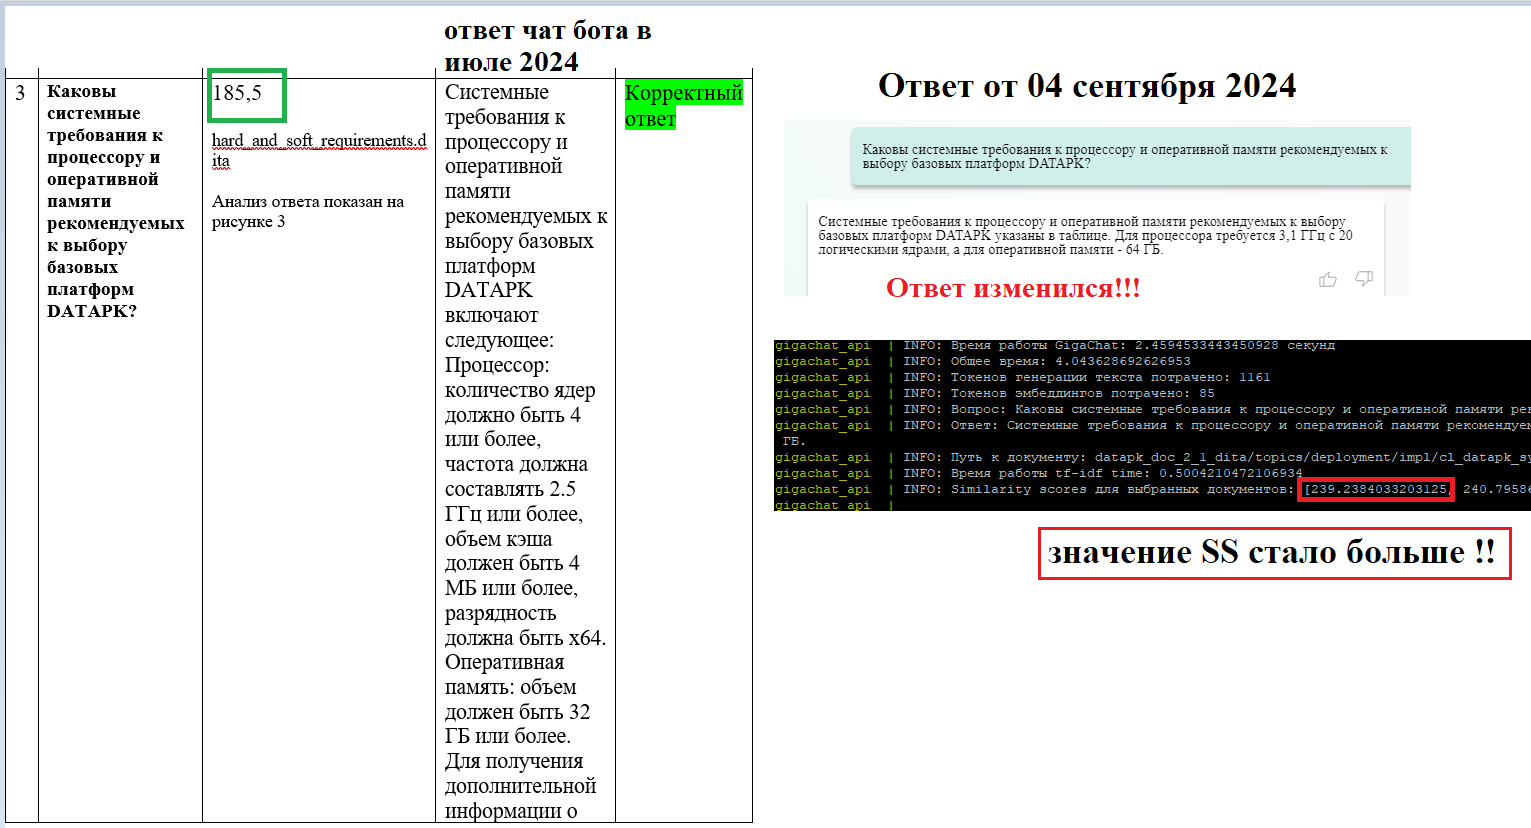

.

Контрольный вопрос:  Каковы системные требования к процессору и оперативной памяти рекомендуемых к выбору базовых платформ DATAPK?    What are the system requirements for processor and RAM of the recommended DATAPK base platforms?

Правильный ответ по золотой разметке (ответ чат бота почти совпадал с эталонным ответом):  Системные требования к процессору и оперативной памяти рекомендуемых к выбору базовых платформ DATAPK включают следующее:
Процессор: количество ядер должно быть 4 или более, частота должна составлять 2.5 ГГц или более, объем кэша должен быть 4 МБ или более, разрядность должна быть x64.
Оперативная память: объем должен быть 32 ГБ или более.
Для получения дополнительной информации о системных требованиях к другим компонентам, включая свободное пространство на жестком диске, сетевую карту, разрешающую способность дисплея и другие требования, обратитесь к соответствующим разделам документации.



The system requirements for the processor and RAM of the recommended DATAPK base platforms include the following:
Processor: the number of cores must be 4 or more, the frequency must be 2.5 GHz or more, the cache must be 4 MB or more, the bit depth must be x64.
RAM: the volume must be 32 GB or more.
For more information on the system requirements for other components, including free space on the hard drive, network card, display resolution and other requirements, please refer to the relevant sections of the documentation.

Изменение ответа в production

Ответ чат бота 04 сентября 2024 (некорректный ответ! sim score стало больше, найден не тот дита файл!!

Системные требования к процессору и оперативной памяти рекомендуемых к выбору базовых платформ DATAPK указаны в таблице. Для процессора требуется 3,1 ГГц с 20 логическими ядрами, а для оперативной памяти - 64 ГБ.

The system requirements for the processor and RAM of the recommended DATAPK base platforms are listed in the table. The processor requires 3.1 GHz with 20 logical cores, and the RAM requires 64 GB.

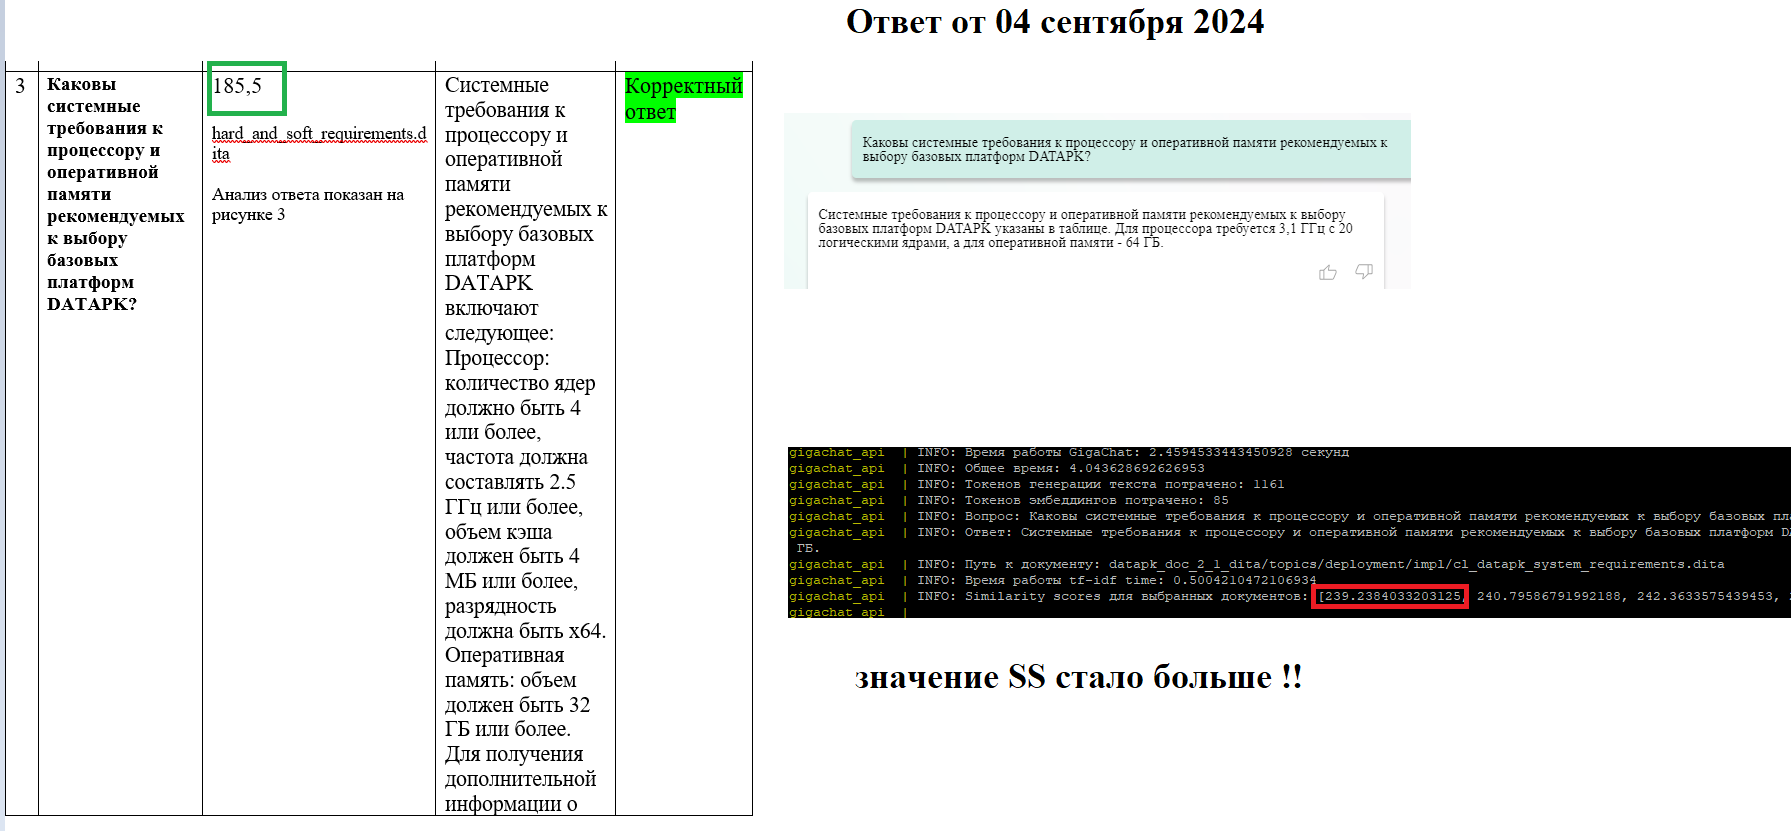

In [ ]:
from datasets import load_metric
rouge = load_metric("rouge")
predictions = ["The system requirements for the processor and RAM of the recommended DATAPK base platforms are listed in the table. The processor requires 3.1 GHz with 20 logical cores, and the RAM requires 64 GB."]
references = ["The system requirements for the processor and RAM of the recommended DATAPK base platforms include the following: Processor: the number of cores must be 4 or more, the frequency must be 2.5 GHz or more, the cache must be 4 MB or more, the bit depth must be x64.RAM: the volume must be 32 GB or more. For more information on the system requirements for other components, including free space on the hard drive, network card, display resolution and other requirements, please refer to the relevant sections of the documentation."]

rouge.compute(predictions=predictions, references=references)

{'rouge1': AggregateScore(low=Score(precision=0.6571428571428571, recall=0.25, fmeasure=0.36220472440944884), mid=Score(precision=0.6571428571428571, recall=0.25, fmeasure=0.36220472440944884), high=Score(precision=0.6571428571428571, recall=0.25, fmeasure=0.36220472440944884)),
 'rouge2': AggregateScore(low=Score(precision=0.38235294117647056, recall=0.14285714285714285, fmeasure=0.20800000000000002), mid=Score(precision=0.38235294117647056, recall=0.14285714285714285, fmeasure=0.20800000000000002), high=Score(precision=0.38235294117647056, recall=0.14285714285714285, fmeasure=0.20800000000000002)),
 'rougeL': AggregateScore(low=Score(precision=0.5714285714285714, recall=0.21739130434782608, fmeasure=0.31496062992125984), mid=Score(precision=0.5714285714285714, recall=0.21739130434782608, fmeasure=0.31496062992125984), high=Score(precision=0.5714285714285714, recall=0.21739130434782608, fmeasure=0.31496062992125984)),
 'rougeLsum': AggregateScore(low=Score(precision=0.5714285714285714

Пример для ROUGE для русского языка:

In [ ]:
from datasets import load_metric

rouge = load_metric("rouge")
predictions = ["Кошки — это замечательные питомцы, которые любят играть."]
references = ["Кошки — отличные домашние животные, которые обожают играть."]
rouge.compute(predictions=predictions, references=references)

{'rouge1': AggregateScore(low=Score(precision=0.0, recall=0.0, fmeasure=0.0), mid=Score(precision=0.0, recall=0.0, fmeasure=0.0), high=Score(precision=0.0, recall=0.0, fmeasure=0.0)),
 'rouge2': AggregateScore(low=Score(precision=0.0, recall=0.0, fmeasure=0.0), mid=Score(precision=0.0, recall=0.0, fmeasure=0.0), high=Score(precision=0.0, recall=0.0, fmeasure=0.0)),
 'rougeL': AggregateScore(low=Score(precision=0.0, recall=0.0, fmeasure=0.0), mid=Score(precision=0.0, recall=0.0, fmeasure=0.0), high=Score(precision=0.0, recall=0.0, fmeasure=0.0)),
 'rougeLsum': AggregateScore(low=Score(precision=0.0, recall=0.0, fmeasure=0.0), mid=Score(precision=0.0, recall=0.0, fmeasure=0.0), high=Score(precision=0.0, recall=0.0, fmeasure=0.0))}

Не работает с таким кодом на русском языке

In [ ]:
pip install transformers datasets


Попробуем другой токенизатор "sentence-transformers/all-MiniLM-L6-v2"

In [ ]:
pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=78ddc2335b004145633b345badb3e2232a7a92d3ebfc449f5b53d236b06094c2
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [ ]:
import spacy
from rouge_score import rouge_scorer
from collections import Counter


In [ ]:
!pip install spacy
!python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 68.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Доработка кода rouge_handmade2.py с лемматизацией (Константин)

In [ ]:
import spacy
from collections import Counter

# Загрузка модели для русского языка
nlp = spacy.load("ru_core_news_sm")

def lemmatize_text(text):
    """ Лемматизация текста с использованием spaCy """
    doc = nlp(text)
    return ' '.join(token.lemma_ for token in doc if not token.is_punct and not token.is_space)

def tokenize_text(text):
    """ Токенизация текста с использованием spaCy """
    doc = nlp(text)
    return [token.text for token in doc if not token.is_punct and not token.is_space]

def print_tokens_and_intersections(reference_text, generated_text):
    """ Печать токенов и количества совпадающих токенов """
    reference_tokens = tokenize_text(reference_text)
    generated_tokens = tokenize_text(generated_text)

    print("Reference Tokens:", reference_tokens)
    print("Generated Tokens:", generated_tokens)

    reference_counter = Counter(reference_tokens)
    generated_counter = Counter(generated_tokens)
    intersection = sum((reference_counter & generated_counter).values())
    print("Number of matching tokens:", intersection)

    return reference_tokens, generated_tokens, reference_counter, generated_counter

def calculate_rouge_metrics(reference_text, generated_text):
    """ Рассчитывает метрики ROUGE-1, ROUGE-2 и ROUGE-L """
    reference_tokens, generated_tokens, reference_counter, generated_counter = print_tokens_and_intersections(reference_text, generated_text)

    # ROUGE-1
    num_matching_unigrams = sum((reference_counter & generated_counter).values())
    total_reference_unigrams = len(reference_tokens)
    total_generated_unigrams = len(generated_tokens)
    rouge_1_recall = num_matching_unigrams / total_reference_unigrams if total_reference_unigrams > 0 else 0
    rouge_1_precision = num_matching_unigrams / total_generated_unigrams if total_generated_unigrams > 0 else 0
    rouge_1_f1 = (2 * rouge_1_precision * rouge_1_recall) / (rouge_1_precision + rouge_1_recall) if (rouge_1_precision + rouge_1_recall) > 0 else 0

    # ROUGE-2
    def get_ngrams(tokens, n):
        return [tuple(tokens[i:i + n]) for i in range(len(tokens) - n + 1)]

    reference_bigrams = get_ngrams(reference_tokens, 2)
    generated_bigrams = get_ngrams(generated_tokens, 2)

    reference_bigram_counter = Counter(reference_bigrams)
    generated_bigram_counter = Counter(generated_bigrams)
    num_matching_bigrams = sum((reference_bigram_counter & generated_bigram_counter).values())
    total_reference_bigrams = len(reference_bigrams)
    total_generated_bigrams = len(generated_bigrams)
    rouge_2_recall = num_matching_bigrams / total_reference_bigrams if total_reference_bigrams > 0 else 0
    rouge_2_precision = num_matching_bigrams / total_generated_bigrams if total_generated_bigrams > 0 else 0
    rouge_2_f1 = (2 * rouge_2_precision * rouge_2_recall) / (rouge_2_precision + rouge_2_recall) if (rouge_2_precision + rouge_2_recall) > 0 else 0

    # ROUGE-L
    def lcs_length(X, Y):
        m = len(X)
        n = len(Y)
        L = [[0] * (n + 1) for _ in range(m + 1)]

        for i in range(m + 1):
            for j in range(n + 1):
                if i == 0 or j == 0:
                    L[i][j] = 0
                elif X[i - 1] == Y[j - 1]:
                    L[i][j] = L[i - 1][j - 1] + 1
                else:
                    L[i][j] = max(L[i - 1][j], L[i][j - 1])

        return L[m][n]

    lcs_len = lcs_length(reference_tokens, generated_tokens)
    total_reference_tokens = len(reference_tokens)
    rouge_l_recall = lcs_len / total_reference_tokens if total_reference_tokens > 0 else 0
    rouge_l_precision = lcs_len / len(generated_tokens) if len(generated_tokens) > 0 else 0
    rouge_l_f1 = (2 * rouge_l_precision * rouge_l_recall) / (rouge_l_precision + rouge_l_recall) if (rouge_l_precision + rouge_l_recall) > 0 else 0

    return (
        rouge_1_recall, rouge_1_precision, rouge_1_f1,
        rouge_2_recall, rouge_2_precision, rouge_2_f1,
        rouge_l_recall, rouge_l_precision, rouge_l_f1
    )

# Примеры текстов
reference = "Быстрая коричневая лисица перепрыгивает через ленивую собаку."
generated = "Быстрая коричневая лисица прыгает через ленивую собаку."

# Лемматизация текста
reference_lemma = lemmatize_text(reference)
generated_lemma = lemmatize_text(generated)

print("Reference (lemmatized):", reference_lemma)
print("Generated (lemmatized):", generated_lemma)

# Расчет метрик ROUGE
(
    rouge_1_recall, rouge_1_precision, rouge_1_f1,
    rouge_2_recall, rouge_2_precision, rouge_2_f1,
    rouge_l_recall, rouge_l_precision, rouge_l_f1
) = calculate_rouge_metrics(reference_lemma, generated_lemma)

print(f"ROUGE-1 Recall: {rouge_1_recall:.3f}")
print(f"ROUGE-1 Precision: {rouge_1_precision:.3f}")
print(f"ROUGE-1 F1: {rouge_1_f1:.3f}")

print(f"ROUGE-2 Recall: {rouge_2_recall:.3f}")
print(f"ROUGE-2 Precision: {rouge_2_precision:.3f}")
print(f"ROUGE-2 F1: {rouge_2_f1:.3f}")

print(f"ROUGE-L Recall: {rouge_l_recall:.3f}")
print(f"ROUGE-L Precision: {rouge_l_precision:.3f}")
print(f"ROUGE-L F1: {rouge_l_f1:.3f}")

Reference (lemmatized): быстрый коричневый лисица перепрыгивать через ленивый собака
Generated (lemmatized): быстрый коричневый лисица прыгать через ленивый собака
Reference Tokens: ['быстрый', 'коричневый', 'лисица', 'перепрыгивать', 'через', 'ленивый', 'собака']
Generated Tokens: ['быстрый', 'коричневый', 'лисица', 'прыгать', 'через', 'ленивый', 'собака']
Number of matching tokens: 6
ROUGE-1 Recall: 0.857
ROUGE-1 Precision: 0.857
ROUGE-1 F1: 0.857
ROUGE-2 Recall: 0.667
ROUGE-2 Precision: 0.667
ROUGE-2 F1: 0.667
ROUGE-L Recall: 0.857
ROUGE-L Precision: 0.857
ROUGE-L F1: 0.857


Пример. Изменение ответа в production.


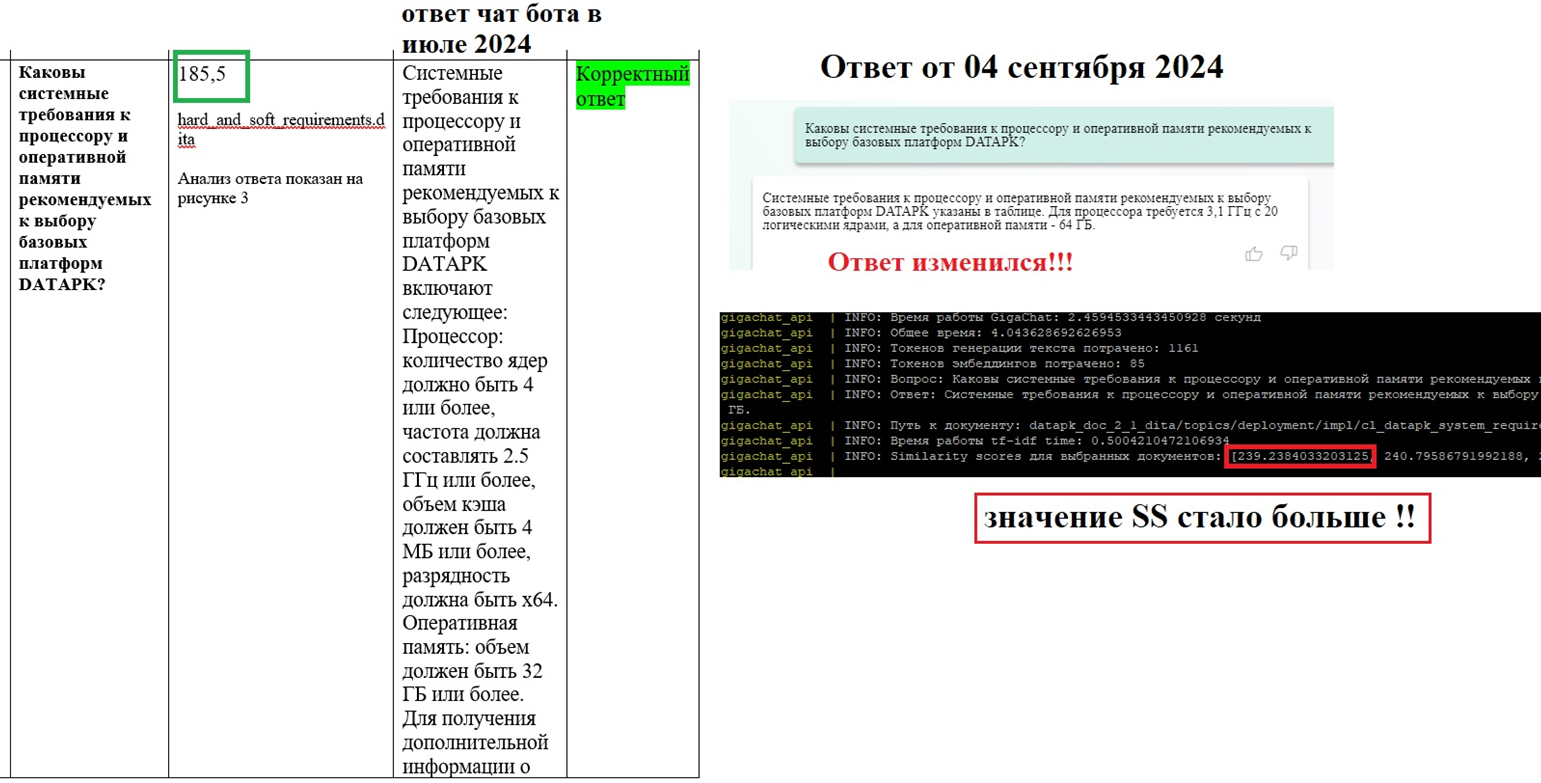

In [ ]:
import spacy
from collections import Counter

# Загрузка модели для русского языка
nlp = spacy.load("ru_core_news_sm")

def lemmatize_text(text):
    """ Лемматизация текста с использованием spaCy """
    doc = nlp(text)
    return ' '.join(token.lemma_ for token in doc if not token.is_punct and not token.is_space)

def tokenize_text(text):
    """ Токенизация текста с использованием spaCy """
    doc = nlp(text)
    return [token.text for token in doc if not token.is_punct and not token.is_space]

def print_tokens_and_intersections(reference_text, generated_text):
    """ Печать токенов и количества совпадающих токенов """
    reference_tokens = tokenize_text(reference_text)
    generated_tokens = tokenize_text(generated_text)

    print("Reference Tokens:", reference_tokens)
    print("Generated Tokens:", generated_tokens)

    reference_counter = Counter(reference_tokens)
    generated_counter = Counter(generated_tokens)
    intersection = sum((reference_counter & generated_counter).values())
    print("Number of matching tokens:", intersection)

    return reference_tokens, generated_tokens, reference_counter, generated_counter

def calculate_rouge_metrics(reference_text, generated_text):
    """ Рассчитывает метрики ROUGE-1, ROUGE-2 и ROUGE-L """
    reference_tokens, generated_tokens, reference_counter, generated_counter = print_tokens_and_intersections(reference_text, generated_text)

    # ROUGE-1
    num_matching_unigrams = sum((reference_counter & generated_counter).values())
    total_reference_unigrams = len(reference_tokens)
    total_generated_unigrams = len(generated_tokens)
    rouge_1_recall = num_matching_unigrams / total_reference_unigrams if total_reference_unigrams > 0 else 0
    rouge_1_precision = num_matching_unigrams / total_generated_unigrams if total_generated_unigrams > 0 else 0
    rouge_1_f1 = (2 * rouge_1_precision * rouge_1_recall) / (rouge_1_precision + rouge_1_recall) if (rouge_1_precision + rouge_1_recall) > 0 else 0

    # ROUGE-2
    def get_ngrams(tokens, n):
        return [tuple(tokens[i:i + n]) for i in range(len(tokens) - n + 1)]

    reference_bigrams = get_ngrams(reference_tokens, 2)
    generated_bigrams = get_ngrams(generated_tokens, 2)

    reference_bigram_counter = Counter(reference_bigrams)
    generated_bigram_counter = Counter(generated_bigrams)
    num_matching_bigrams = sum((reference_bigram_counter & generated_bigram_counter).values())
    total_reference_bigrams = len(reference_bigrams)
    total_generated_bigrams = len(generated_bigrams)
    rouge_2_recall = num_matching_bigrams / total_reference_bigrams if total_reference_bigrams > 0 else 0
    rouge_2_precision = num_matching_bigrams / total_generated_bigrams if total_generated_bigrams > 0 else 0
    rouge_2_f1 = (2 * rouge_2_precision * rouge_2_recall) / (rouge_2_precision + rouge_2_recall) if (rouge_2_precision + rouge_2_recall) > 0 else 0

    # ROUGE-L
    def lcs_length(X, Y):
        m = len(X)
        n = len(Y)
        L = [[0] * (n + 1) for _ in range(m + 1)]

        for i in range(m + 1):
            for j in range(n + 1):
                if i == 0 or j == 0:
                    L[i][j] = 0
                elif X[i - 1] == Y[j - 1]:
                    L[i][j] = L[i - 1][j - 1] + 1
                else:
                    L[i][j] = max(L[i - 1][j], L[i][j - 1])

        return L[m][n]

    lcs_len = lcs_length(reference_tokens, generated_tokens)
    total_reference_tokens = len(reference_tokens)
    rouge_l_recall = lcs_len / total_reference_tokens if total_reference_tokens > 0 else 0
    rouge_l_precision = lcs_len / len(generated_tokens) if len(generated_tokens) > 0 else 0
    rouge_l_f1 = (2 * rouge_l_precision * rouge_l_recall) / (rouge_l_precision + rouge_l_recall) if (rouge_l_precision + rouge_l_recall) > 0 else 0

    return (
        rouge_1_recall, rouge_1_precision, rouge_1_f1,
        rouge_2_recall, rouge_2_precision, rouge_2_f1,
        rouge_l_recall, rouge_l_precision, rouge_l_f1
    )

generated = "Системные требования к процессору и оперативной памяти рекомендуемых к выбору базовых платформ DATAPK указаны в таблице. Для процессора требуется 3,1 ГГц с 20 логическими ядрами, а для оперативной памяти - 64 ГБ." # Ответ чат бота (LLM)
reference = "Системные требования к процессору и оперативной памяти рекомендуемых к выбору базовых платформ DATAPK включают следующее: Процессор: количество ядер должно быть 4 или более, частота должна составлять 2.5 ГГц или более, объем кэша должен быть 4 МБ или более, разрядность должна быть x64. Оперативная память: объем должен быть 32 ГБ или более. Для получения дополнительной информации о системных требованиях к другим компонентам, включая свободное пространство на жестком диске, сетевую карту, разрешающую способность дисплея и другие требования, обратитесь к соответствующим разделам документации." # Эталонный ответ (ответ по документации)

# reference = "Быстрая коричневая лисица перепрыгивает через ленивую собаку."
# generated = "Быстрая коричневая лисица прыгает через ленивую собаку."

# Лемматизация текста
reference_lemma = lemmatize_text(reference)
generated_lemma = lemmatize_text(generated)

print("Reference (lemmatized):", reference_lemma)
print("Generated (lemmatized):", generated_lemma)

# Расчет метрик ROUGE
(
    rouge_1_recall, rouge_1_precision, rouge_1_f1,
    rouge_2_recall, rouge_2_precision, rouge_2_f1,
    rouge_l_recall, rouge_l_precision, rouge_l_f1
) = calculate_rouge_metrics(reference_lemma, generated_lemma)

print(f"ROUGE-1 Recall: {rouge_1_recall:.3f}")
print(f"ROUGE-1 Precision: {rouge_1_precision:.3f}")
print(f"ROUGE-1 F1: {rouge_1_f1:.3f}")

print(f"ROUGE-2 Recall: {rouge_2_recall:.3f}")
print(f"ROUGE-2 Precision: {rouge_2_precision:.3f}")
print(f"ROUGE-2 F1: {rouge_2_f1:.3f}")

print(f"ROUGE-L Recall: {rouge_l_recall:.3f}")
print(f"ROUGE-L Precision: {rouge_l_precision:.3f}")
print(f"ROUGE-L F1: {rouge_l_f1:.3f}")

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Reference (lemmatized): системный требование к процессор и оперативный память рекомендовать к выбор базовый платформа datapk включать следующий процессор количество ядро должный быть 4 или более частота должный составлять 2.5 ггц или более объём кэша должный быть 4 мб или более разрядность должный быть x64 оперативный память объём должный быть 32 гб или более Для получение дополнительный информация о системный требование к другим компонента включая свободный пространство на жёсткий диск сетевой карта разрешать способность дисплей и другие требование обратиться к соответствующий раздел документация
Generated (lemmatized): системный требование к процессор и оперативный память рекомендовать к выбор базовый платформа datapk указать в таблица Для процессор требоваться 3,1 ггц с 20 логический ядро а для оперативный память 64 гб
Reference Tokens: ['системный', 'требование', 'к', 'процессор', 'и', 'оперативный', 'память', 'рекомендовать', 'к', 'выбор', 'базовый', 'платформа', 'datapk', 'включа

Пример для datapk-itm

In [ ]:
import spacy
from collections import Counter

# Загрузка модели для русского языка
nlp = spacy.load("ru_core_news_sm")

def lemmatize_text(text):
    """ Лемматизация текста с использованием spaCy """
    doc = nlp(text)
    return ' '.join(token.lemma_ for token in doc if not token.is_punct and not token.is_space)

def tokenize_text(text):
    """ Токенизация текста с использованием spaCy """
    doc = nlp(text)
    return [token.text for token in doc if not token.is_punct and not token.is_space]

def print_tokens_and_intersections(reference_text, generated_text):
    """ Печать токенов и количества совпадающих токенов """
    reference_tokens = tokenize_text(reference_text)
    generated_tokens = tokenize_text(generated_text)

    print("Reference Tokens:", reference_tokens)
    print("Generated Tokens:", generated_tokens)

    reference_counter = Counter(reference_tokens)
    generated_counter = Counter(generated_tokens)
    intersection = sum((reference_counter & generated_counter).values())
    print("Number of matching tokens:", intersection)

    return reference_tokens, generated_tokens, reference_counter, generated_counter

def calculate_rouge_metrics(reference_text, generated_text):
    """ Рассчитывает метрики ROUGE-1, ROUGE-2 и ROUGE-L """
    reference_tokens, generated_tokens, reference_counter, generated_counter = print_tokens_and_intersections(reference_text, generated_text)

    # ROUGE-1
    num_matching_unigrams = sum((reference_counter & generated_counter).values())
    total_reference_unigrams = len(reference_tokens)
    total_generated_unigrams = len(generated_tokens)
    rouge_1_recall = num_matching_unigrams / total_reference_unigrams if total_reference_unigrams > 0 else 0
    rouge_1_precision = num_matching_unigrams / total_generated_unigrams if total_generated_unigrams > 0 else 0
    rouge_1_f1 = (2 * rouge_1_precision * rouge_1_recall) / (rouge_1_precision + rouge_1_recall) if (rouge_1_precision + rouge_1_recall) > 0 else 0

    # ROUGE-2
    def get_ngrams(tokens, n):
        return [tuple(tokens[i:i + n]) for i in range(len(tokens) - n + 1)]

    reference_bigrams = get_ngrams(reference_tokens, 2)
    generated_bigrams = get_ngrams(generated_tokens, 2)

    reference_bigram_counter = Counter(reference_bigrams)
    generated_bigram_counter = Counter(generated_bigrams)
    num_matching_bigrams = sum((reference_bigram_counter & generated_bigram_counter).values())
    total_reference_bigrams = len(reference_bigrams)
    total_generated_bigrams = len(generated_bigrams)
    rouge_2_recall = num_matching_bigrams / total_reference_bigrams if total_reference_bigrams > 0 else 0
    rouge_2_precision = num_matching_bigrams / total_generated_bigrams if total_generated_bigrams > 0 else 0
    rouge_2_f1 = (2 * rouge_2_precision * rouge_2_recall) / (rouge_2_precision + rouge_2_recall) if (rouge_2_precision + rouge_2_recall) > 0 else 0

    # ROUGE-L
    def lcs_length(X, Y):
        m = len(X)
        n = len(Y)
        L = [[0] * (n + 1) for _ in range(m + 1)]

        for i in range(m + 1):
            for j in range(n + 1):
                if i == 0 or j == 0:
                    L[i][j] = 0
                elif X[i - 1] == Y[j - 1]:
                    L[i][j] = L[i - 1][j - 1] + 1
                else:
                    L[i][j] = max(L[i - 1][j], L[i][j - 1])

        return L[m][n]

    lcs_len = lcs_length(reference_tokens, generated_tokens)
    total_reference_tokens = len(reference_tokens)
    rouge_l_recall = lcs_len / total_reference_tokens if total_reference_tokens > 0 else 0
    rouge_l_precision = lcs_len / len(generated_tokens) if len(generated_tokens) > 0 else 0
    rouge_l_f1 = (2 * rouge_l_precision * rouge_l_recall) / (rouge_l_precision + rouge_l_recall) if (rouge_l_precision + rouge_l_recall) > 0 else 0

    return (
        rouge_1_recall, rouge_1_precision, rouge_1_f1,
        rouge_2_recall, rouge_2_precision, rouge_2_f1,
        rouge_l_recall, rouge_l_precision, rouge_l_f1
    )

generated = "Причина: Контейнер itm_m_siem_connector может перезапускаться из-за отсутствия необходимых переменных окружения и в файле .env при включенной интеграции с SIEM. Для устранения этой проблемы необходимо проверить наличие этих переменных в файле .env и убедиться, что они правильно настроены."
reference = " Причина: Отсутствие переменных SIEM_SYSLOG_HOST и ITMM_IP_ADDRESS в файле .env при включенной интеграции с SIEM"

# Лемматизация текста
reference_lemma = lemmatize_text(reference)
generated_lemma = lemmatize_text(generated)

print("Reference (lemmatized):", reference_lemma)
print("Generated (lemmatized):", generated_lemma)

# Расчет метрик ROUGE
(
    rouge_1_recall, rouge_1_precision, rouge_1_f1,
    rouge_2_recall, rouge_2_precision, rouge_2_f1,
    rouge_l_recall, rouge_l_precision, rouge_l_f1
) = calculate_rouge_metrics(reference_lemma, generated_lemma)

print(f"ROUGE-1 Recall: {rouge_1_recall:.3f}")
print(f"ROUGE-1 Precision: {rouge_1_precision:.3f}")
print(f"ROUGE-1 F1: {rouge_1_f1:.3f}")

print(f"ROUGE-2 Recall: {rouge_2_recall:.3f}")
print(f"ROUGE-2 Precision: {rouge_2_precision:.3f}")
print(f"ROUGE-2 F1: {rouge_2_f1:.3f}")

print(f"ROUGE-L Recall: {rouge_l_recall:.3f}")
print(f"ROUGE-L Precision: {rouge_l_precision:.3f}")
print(f"ROUGE-L F1: {rouge_l_f1:.3f}")

Reference (lemmatized): причина отсутствие переменный siem_syslog_host и itmm_ip_address в файл .env при включить интеграция с siem
Generated (lemmatized): причина контейнер itm_m_siem_connector мочь перезапускаться из за отсутствие необходимый переменный окружение и в файл .env при включить интеграция с siem Для устранение этот проблема необходимый проверить наличие этот переменных в файл .env и убедиться что они правильно настроены
Reference Tokens: ['причина', 'отсутствие', 'переменный', 'siem_syslog_host', 'и', 'itmm_ip_address', 'в', 'файл', '.env', 'при', 'включить', 'интеграция', 'с', 'siem']
Generated Tokens: ['причина', 'контейнер', 'itm_m_siem_connector', 'мочь', 'перезапускаться', 'из', 'за', 'отсутствие', 'необходимый', 'переменный', 'окружение', 'и', 'в', 'файл', '.env', 'при', 'включить', 'интеграция', 'с', 'siem', 'Для', 'устранение', 'этот', 'проблема', 'необходимый', 'проверить', 'наличие', 'этот', 'переменных', 'в', 'файл', '.env', 'и', 'убедиться', 'что', 'они', 'пра

2 вариант - если ответ будет более лаконичнее и приблиижен к эталонному

In [ ]:
import spacy
from collections import Counter

# Загрузка модели для русского языка
nlp = spacy.load("ru_core_news_sm")

def lemmatize_text(text):
    """ Лемматизация текста с использованием spaCy """
    doc = nlp(text)
    return ' '.join(token.lemma_ for token in doc if not token.is_punct and not token.is_space)

def tokenize_text(text):
    """ Токенизация текста с использованием spaCy """
    doc = nlp(text)
    return [token.text for token in doc if not token.is_punct and not token.is_space]

def print_tokens_and_intersections(reference_text, generated_text):
    """ Печать токенов и количества совпадающих токенов """
    reference_tokens = tokenize_text(reference_text)
    generated_tokens = tokenize_text(generated_text)

    print("Reference Tokens:", reference_tokens)
    print("Generated Tokens:", generated_tokens)

    reference_counter = Counter(reference_tokens)
    generated_counter = Counter(generated_tokens)
    intersection = sum((reference_counter & generated_counter).values())
    print("Number of matching tokens:", intersection)

    return reference_tokens, generated_tokens, reference_counter, generated_counter

def calculate_rouge_metrics(reference_text, generated_text):
    """ Рассчитывает метрики ROUGE-1, ROUGE-2 и ROUGE-L """
    reference_tokens, generated_tokens, reference_counter, generated_counter = print_tokens_and_intersections(reference_text, generated_text)

    # ROUGE-1
    num_matching_unigrams = sum((reference_counter & generated_counter).values())
    total_reference_unigrams = len(reference_tokens)
    total_generated_unigrams = len(generated_tokens)
    rouge_1_recall = num_matching_unigrams / total_reference_unigrams if total_reference_unigrams > 0 else 0
    rouge_1_precision = num_matching_unigrams / total_generated_unigrams if total_generated_unigrams > 0 else 0
    rouge_1_f1 = (2 * rouge_1_precision * rouge_1_recall) / (rouge_1_precision + rouge_1_recall) if (rouge_1_precision + rouge_1_recall) > 0 else 0

    # ROUGE-2
    def get_ngrams(tokens, n):
        return [tuple(tokens[i:i + n]) for i in range(len(tokens) - n + 1)]

    reference_bigrams = get_ngrams(reference_tokens, 2)
    generated_bigrams = get_ngrams(generated_tokens, 2)

    reference_bigram_counter = Counter(reference_bigrams)
    generated_bigram_counter = Counter(generated_bigrams)
    num_matching_bigrams = sum((reference_bigram_counter & generated_bigram_counter).values())
    total_reference_bigrams = len(reference_bigrams)
    total_generated_bigrams = len(generated_bigrams)
    rouge_2_recall = num_matching_bigrams / total_reference_bigrams if total_reference_bigrams > 0 else 0
    rouge_2_precision = num_matching_bigrams / total_generated_bigrams if total_generated_bigrams > 0 else 0
    rouge_2_f1 = (2 * rouge_2_precision * rouge_2_recall) / (rouge_2_precision + rouge_2_recall) if (rouge_2_precision + rouge_2_recall) > 0 else 0

    # ROUGE-L
    def lcs_length(X, Y):
        m = len(X)
        n = len(Y)
        L = [[0] * (n + 1) for _ in range(m + 1)]

        for i in range(m + 1):
            for j in range(n + 1):
                if i == 0 or j == 0:
                    L[i][j] = 0
                elif X[i - 1] == Y[j - 1]:
                    L[i][j] = L[i - 1][j - 1] + 1
                else:
                    L[i][j] = max(L[i - 1][j], L[i][j - 1])

        return L[m][n]

    lcs_len = lcs_length(reference_tokens, generated_tokens)
    total_reference_tokens = len(reference_tokens)
    rouge_l_recall = lcs_len / total_reference_tokens if total_reference_tokens > 0 else 0
    rouge_l_precision = lcs_len / len(generated_tokens) if len(generated_tokens) > 0 else 0
    rouge_l_f1 = (2 * rouge_l_precision * rouge_l_recall) / (rouge_l_precision + rouge_l_recall) if (rouge_l_precision + rouge_l_recall) > 0 else 0

    return (
        rouge_1_recall, rouge_1_precision, rouge_1_f1,
        rouge_2_recall, rouge_2_precision, rouge_2_f1,
        rouge_l_recall, rouge_l_precision, rouge_l_f1
    )

generated = "Причина: Контейнер itm_m_siem_connector может перезапускаться из-за отсутствия необходимых переменных окружения и в файле .env при включенной интеграции с SIEM."
reference = " Причина: Отсутствие переменных SIEM_SYSLOG_HOST и ITMM_IP_ADDRESS в файле .env при включенной интеграции с SIEM"


# Лемматизация текста
reference_lemma = lemmatize_text(reference)
generated_lemma = lemmatize_text(generated)

print("Reference (lemmatized):", reference_lemma)
print("Generated (lemmatized):", generated_lemma)

# Расчет метрик ROUGE
(
    rouge_1_recall, rouge_1_precision, rouge_1_f1,
    rouge_2_recall, rouge_2_precision, rouge_2_f1,
    rouge_l_recall, rouge_l_precision, rouge_l_f1
) = calculate_rouge_metrics(reference_lemma, generated_lemma)

print(f"ROUGE-1 Recall: {rouge_1_recall:.3f}")
print(f"ROUGE-1 Precision: {rouge_1_precision:.3f}")
print(f"ROUGE-1 F1: {rouge_1_f1:.3f}")

print(f"ROUGE-2 Recall: {rouge_2_recall:.3f}")
print(f"ROUGE-2 Precision: {rouge_2_precision:.3f}")
print(f"ROUGE-2 F1: {rouge_2_f1:.3f}")

print(f"ROUGE-L Recall: {rouge_l_recall:.3f}")
print(f"ROUGE-L Precision: {rouge_l_precision:.3f}")
print(f"ROUGE-L F1: {rouge_l_f1:.3f}")

Reference (lemmatized): причина отсутствие переменный siem_syslog_host и itmm_ip_address в файл .env при включить интеграция с siem
Generated (lemmatized): причина контейнер itm_m_siem_connector мочь перезапускаться из за отсутствие необходимый переменный окружение и в файл .env при включить интеграция с siem
Reference Tokens: ['причина', 'отсутствие', 'переменный', 'siem_syslog_host', 'и', 'itmm_ip_address', 'в', 'файл', '.env', 'при', 'включить', 'интеграция', 'с', 'siem']
Generated Tokens: ['причина', 'контейнер', 'itm_m_siem_connector', 'мочь', 'перезапускаться', 'из', 'за', 'отсутствие', 'необходимый', 'переменный', 'окружение', 'и', 'в', 'файл', '.env', 'при', 'включить', 'интеграция', 'с', 'siem']
Number of matching tokens: 12
ROUGE-1 Recall: 0.857
ROUGE-1 Precision: 0.600
ROUGE-1 F1: 0.706
ROUGE-2 Recall: 0.538
ROUGE-2 Precision: 0.368
ROUGE-2 F1: 0.438
ROUGE-L Recall: 0.857
ROUGE-L Precision: 0.600
ROUGE-L F1: 0.706


3 вариант если ответ чат бота идеальный как в документации

In [ ]:
import spacy
from collections import Counter

# Загрузка модели для русского языка
nlp = spacy.load("ru_core_news_sm")

def lemmatize_text(text):
    """ Лемматизация текста с использованием spaCy """
    doc = nlp(text)
    return ' '.join(token.lemma_ for token in doc if not token.is_punct and not token.is_space)

def tokenize_text(text):
    """ Токенизация текста с использованием spaCy """
    doc = nlp(text)
    return [token.text for token in doc if not token.is_punct and not token.is_space]

def print_tokens_and_intersections(reference_text, generated_text):
    """ Печать токенов и количества совпадающих токенов """
    reference_tokens = tokenize_text(reference_text)
    generated_tokens = tokenize_text(generated_text)

    print("Reference Tokens:", reference_tokens)
    print("Generated Tokens:", generated_tokens)

    reference_counter = Counter(reference_tokens)
    generated_counter = Counter(generated_tokens)
    intersection = sum((reference_counter & generated_counter).values())
    print("Number of matching tokens:", intersection)

    return reference_tokens, generated_tokens, reference_counter, generated_counter

def calculate_rouge_metrics(reference_text, generated_text):
    """ Рассчитывает метрики ROUGE-1, ROUGE-2 и ROUGE-L """
    reference_tokens, generated_tokens, reference_counter, generated_counter = print_tokens_and_intersections(reference_text, generated_text)

    # ROUGE-1
    num_matching_unigrams = sum((reference_counter & generated_counter).values())
    total_reference_unigrams = len(reference_tokens)
    total_generated_unigrams = len(generated_tokens)
    rouge_1_recall = num_matching_unigrams / total_reference_unigrams if total_reference_unigrams > 0 else 0
    rouge_1_precision = num_matching_unigrams / total_generated_unigrams if total_generated_unigrams > 0 else 0
    rouge_1_f1 = (2 * rouge_1_precision * rouge_1_recall) / (rouge_1_precision + rouge_1_recall) if (rouge_1_precision + rouge_1_recall) > 0 else 0

    # ROUGE-2
    def get_ngrams(tokens, n):
        return [tuple(tokens[i:i + n]) for i in range(len(tokens) - n + 1)]

    reference_bigrams = get_ngrams(reference_tokens, 2)
    generated_bigrams = get_ngrams(generated_tokens, 2)

    reference_bigram_counter = Counter(reference_bigrams)
    generated_bigram_counter = Counter(generated_bigrams)
    num_matching_bigrams = sum((reference_bigram_counter & generated_bigram_counter).values())
    total_reference_bigrams = len(reference_bigrams)
    total_generated_bigrams = len(generated_bigrams)
    rouge_2_recall = num_matching_bigrams / total_reference_bigrams if total_reference_bigrams > 0 else 0
    rouge_2_precision = num_matching_bigrams / total_generated_bigrams if total_generated_bigrams > 0 else 0
    rouge_2_f1 = (2 * rouge_2_precision * rouge_2_recall) / (rouge_2_precision + rouge_2_recall) if (rouge_2_precision + rouge_2_recall) > 0 else 0

    # ROUGE-L
    def lcs_length(X, Y):
        m = len(X)
        n = len(Y)
        L = [[0] * (n + 1) for _ in range(m + 1)]

        for i in range(m + 1):
            for j in range(n + 1):
                if i == 0 or j == 0:
                    L[i][j] = 0
                elif X[i - 1] == Y[j - 1]:
                    L[i][j] = L[i - 1][j - 1] + 1
                else:
                    L[i][j] = max(L[i - 1][j], L[i][j - 1])

        return L[m][n]

    lcs_len = lcs_length(reference_tokens, generated_tokens)
    total_reference_tokens = len(reference_tokens)
    rouge_l_recall = lcs_len / total_reference_tokens if total_reference_tokens > 0 else 0
    rouge_l_precision = lcs_len / len(generated_tokens) if len(generated_tokens) > 0 else 0
    rouge_l_f1 = (2 * rouge_l_precision * rouge_l_recall) / (rouge_l_precision + rouge_l_recall) if (rouge_l_precision + rouge_l_recall) > 0 else 0

    return (
        rouge_1_recall, rouge_1_precision, rouge_1_f1,
        rouge_2_recall, rouge_2_precision, rouge_2_f1,
        rouge_l_recall, rouge_l_precision, rouge_l_f1
    )

generated = "Причина: Отсутствие переменных SIEM_SYSLOG_HOST и ITMM_IP_ADDRESS в файле .env при включенной интеграции с SIEM"
reference = "Причина: Отсутствие переменных SIEM_SYSLOG_HOST и ITMM_IP_ADDRESS в файле .env при включенной интеграции с SIEM"


# Лемматизация текста
reference_lemma = lemmatize_text(reference)
generated_lemma = lemmatize_text(generated)

print("Reference (lemmatized):", reference_lemma)
print("Generated (lemmatized):", generated_lemma)

# Расчет метрик ROUGE
(
    rouge_1_recall, rouge_1_precision, rouge_1_f1,
    rouge_2_recall, rouge_2_precision, rouge_2_f1,
    rouge_l_recall, rouge_l_precision, rouge_l_f1
) = calculate_rouge_metrics(reference_lemma, generated_lemma)

print(f"ROUGE-1 Recall: {rouge_1_recall:.3f}")
print(f"ROUGE-1 Precision: {rouge_1_precision:.3f}")
print(f"ROUGE-1 F1: {rouge_1_f1:.3f}")

print(f"ROUGE-2 Recall: {rouge_2_recall:.3f}")
print(f"ROUGE-2 Precision: {rouge_2_precision:.3f}")
print(f"ROUGE-2 F1: {rouge_2_f1:.3f}")

print(f"ROUGE-L Recall: {rouge_l_recall:.3f}")
print(f"ROUGE-L Precision: {rouge_l_precision:.3f}")
print(f"ROUGE-L F1: {rouge_l_f1:.3f}")

Reference (lemmatized): причина отсутствие переменный siem_syslog_host и itmm_ip_address в файл .env при включить интеграция с siem
Generated (lemmatized): причина отсутствие переменный siem_syslog_host и itmm_ip_address в файл .env при включить интеграция с siem
Reference Tokens: ['причина', 'отсутствие', 'переменный', 'siem_syslog_host', 'и', 'itmm_ip_address', 'в', 'файл', '.env', 'при', 'включить', 'интеграция', 'с', 'siem']
Generated Tokens: ['причина', 'отсутствие', 'переменный', 'siem_syslog_host', 'и', 'itmm_ip_address', 'в', 'файл', '.env', 'при', 'включить', 'интеграция', 'с', 'siem']
Number of matching tokens: 14
ROUGE-1 Recall: 1.000
ROUGE-1 Precision: 1.000
ROUGE-1 F1: 1.000
ROUGE-2 Recall: 1.000
ROUGE-2 Precision: 1.000
ROUGE-2 F1: 1.000
ROUGE-L Recall: 1.000
ROUGE-L Precision: 1.000
ROUGE-L F1: 1.000


4  вариант - если ответ - бред

In [ ]:
import spacy
from collections import Counter

# Загрузка модели для русского языка
nlp = spacy.load("ru_core_news_sm")

def lemmatize_text(text):
    """ Лемматизация текста с использованием spaCy """
    doc = nlp(text)
    return ' '.join(token.lemma_ for token in doc if not token.is_punct and not token.is_space)

def tokenize_text(text):
    """ Токенизация текста с использованием spaCy """
    doc = nlp(text)
    return [token.text for token in doc if not token.is_punct and not token.is_space]

def print_tokens_and_intersections(reference_text, generated_text):
    """ Печать токенов и количества совпадающих токенов """
    reference_tokens = tokenize_text(reference_text)
    generated_tokens = tokenize_text(generated_text)

    print("Reference Tokens:", reference_tokens)
    print("Generated Tokens:", generated_tokens)

    reference_counter = Counter(reference_tokens)
    generated_counter = Counter(generated_tokens)
    intersection = sum((reference_counter & generated_counter).values())
    print("Number of matching tokens:", intersection)

    return reference_tokens, generated_tokens, reference_counter, generated_counter

def calculate_rouge_metrics(reference_text, generated_text):
    """ Рассчитывает метрики ROUGE-1, ROUGE-2 и ROUGE-L """
    reference_tokens, generated_tokens, reference_counter, generated_counter = print_tokens_and_intersections(reference_text, generated_text)

    # ROUGE-1
    num_matching_unigrams = sum((reference_counter & generated_counter).values())
    total_reference_unigrams = len(reference_tokens)
    total_generated_unigrams = len(generated_tokens)
    rouge_1_recall = num_matching_unigrams / total_reference_unigrams if total_reference_unigrams > 0 else 0
    rouge_1_precision = num_matching_unigrams / total_generated_unigrams if total_generated_unigrams > 0 else 0
    rouge_1_f1 = (2 * rouge_1_precision * rouge_1_recall) / (rouge_1_precision + rouge_1_recall) if (rouge_1_precision + rouge_1_recall) > 0 else 0

    # ROUGE-2
    def get_ngrams(tokens, n):
        return [tuple(tokens[i:i + n]) for i in range(len(tokens) - n + 1)]

    reference_bigrams = get_ngrams(reference_tokens, 2)
    generated_bigrams = get_ngrams(generated_tokens, 2)

    reference_bigram_counter = Counter(reference_bigrams)
    generated_bigram_counter = Counter(generated_bigrams)
    num_matching_bigrams = sum((reference_bigram_counter & generated_bigram_counter).values())
    total_reference_bigrams = len(reference_bigrams)
    total_generated_bigrams = len(generated_bigrams)
    rouge_2_recall = num_matching_bigrams / total_reference_bigrams if total_reference_bigrams > 0 else 0
    rouge_2_precision = num_matching_bigrams / total_generated_bigrams if total_generated_bigrams > 0 else 0
    rouge_2_f1 = (2 * rouge_2_precision * rouge_2_recall) / (rouge_2_precision + rouge_2_recall) if (rouge_2_precision + rouge_2_recall) > 0 else 0

    # ROUGE-L
    def lcs_length(X, Y):
        m = len(X)
        n = len(Y)
        L = [[0] * (n + 1) for _ in range(m + 1)]

        for i in range(m + 1):
            for j in range(n + 1):
                if i == 0 or j == 0:
                    L[i][j] = 0
                elif X[i - 1] == Y[j - 1]:
                    L[i][j] = L[i - 1][j - 1] + 1
                else:
                    L[i][j] = max(L[i - 1][j], L[i][j - 1])

        return L[m][n]

    lcs_len = lcs_length(reference_tokens, generated_tokens)
    total_reference_tokens = len(reference_tokens)
    rouge_l_recall = lcs_len / total_reference_tokens if total_reference_tokens > 0 else 0
    rouge_l_precision = lcs_len / len(generated_tokens) if len(generated_tokens) > 0 else 0
    rouge_l_f1 = (2 * rouge_l_precision * rouge_l_recall) / (rouge_l_precision + rouge_l_recall) if (rouge_l_precision + rouge_l_recall) > 0 else 0

    return (
        rouge_1_recall, rouge_1_precision, rouge_1_f1,
        rouge_2_recall, rouge_2_precision, rouge_2_f1,
        rouge_l_recall, rouge_l_precision, rouge_l_f1
    )

generated = "Потому что вы забыли выключить утюг и сожшли квартиру"
reference = "Причина: Отсутствие переменных SIEM_SYSLOG_HOST и ITMM_IP_ADDRESS в файле .env при включенной интеграции с SIEM"


# Лемматизация текста
reference_lemma = lemmatize_text(reference)
generated_lemma = lemmatize_text(generated)

print("Reference (lemmatized):", reference_lemma)
print("Generated (lemmatized):", generated_lemma)

# Расчет метрик ROUGE
(
    rouge_1_recall, rouge_1_precision, rouge_1_f1,
    rouge_2_recall, rouge_2_precision, rouge_2_f1,
    rouge_l_recall, rouge_l_precision, rouge_l_f1
) = calculate_rouge_metrics(reference_lemma, generated_lemma)

print(f"ROUGE-1 Recall: {rouge_1_recall:.3f}")
print(f"ROUGE-1 Precision: {rouge_1_precision:.3f}")
print(f"ROUGE-1 F1: {rouge_1_f1:.3f}")

print(f"ROUGE-2 Recall: {rouge_2_recall:.3f}")
print(f"ROUGE-2 Precision: {rouge_2_precision:.3f}")
print(f"ROUGE-2 F1: {rouge_2_f1:.3f}")

print(f"ROUGE-L Recall: {rouge_l_recall:.3f}")
print(f"ROUGE-L Precision: {rouge_l_precision:.3f}")
print(f"ROUGE-L F1: {rouge_l_f1:.3f}")

Reference (lemmatized): причина отсутствие переменный siem_syslog_host и itmm_ip_address в файл .env при включить интеграция с siem
Generated (lemmatized): потому что вы забыть выключить утюг и сожшли квартира
Reference Tokens: ['причина', 'отсутствие', 'переменный', 'siem_syslog_host', 'и', 'itmm_ip_address', 'в', 'файл', '.env', 'при', 'включить', 'интеграция', 'с', 'siem']
Generated Tokens: ['потому', 'что', 'вы', 'забыть', 'выключить', 'утюг', 'и', 'сожшли', 'квартира']
Number of matching tokens: 1
ROUGE-1 Recall: 0.071
ROUGE-1 Precision: 0.111
ROUGE-1 F1: 0.087
ROUGE-2 Recall: 0.000
ROUGE-2 Precision: 0.000
ROUGE-2 F1: 0.000
ROUGE-L Recall: 0.071
ROUGE-L Precision: 0.111
ROUGE-L F1: 0.087


Пример сложных ситуации типа был был ответ "Установка драйверов для комплекса требуется" , а стал через месяц ответ "Установка драйверов для комплекса НЕ требуется" . Как изменится значение метрик? например была F мера 1 (при идеальном совпадении референсного и сгенерированного ответов), а стала во втором варианте 0,727 (а у нас допуск -порог срабатывания сигнализации 0,4 например).

In [ ]:
import spacy
from collections import Counter

# Загрузка модели для русского языка
nlp = spacy.load("ru_core_news_sm")

def lemmatize_text(text):
    """ Лемматизация текста с использованием spaCy """
    doc = nlp(text)
    return ' '.join(token.lemma_ for token in doc if not token.is_punct and not token.is_space)

def tokenize_text(text):
    """ Токенизация текста с использованием spaCy """
    doc = nlp(text)
    return [token.text for token in doc if not token.is_punct and not token.is_space]

def print_tokens_and_intersections(reference_text, generated_text):
    """ Печать токенов и количества совпадающих токенов """
    reference_tokens = tokenize_text(reference_text)
    generated_tokens = tokenize_text(generated_text)

    print("Reference Tokens:", reference_tokens)
    print("Generated Tokens:", generated_tokens)

    reference_counter = Counter(reference_tokens)
    generated_counter = Counter(generated_tokens)
    intersection = sum((reference_counter & generated_counter).values())
    print("Number of matching tokens:", intersection)

    return reference_tokens, generated_tokens, reference_counter, generated_counter

def calculate_rouge_metrics(reference_text, generated_text):
    """ Рассчитывает метрики ROUGE-1, ROUGE-2 и ROUGE-L """
    reference_tokens, generated_tokens, reference_counter, generated_counter = print_tokens_and_intersections(reference_text, generated_text)

    # ROUGE-1
    num_matching_unigrams = sum((reference_counter & generated_counter).values())
    total_reference_unigrams = len(reference_tokens)
    total_generated_unigrams = len(generated_tokens)
    rouge_1_recall = num_matching_unigrams / total_reference_unigrams if total_reference_unigrams > 0 else 0
    rouge_1_precision = num_matching_unigrams / total_generated_unigrams if total_generated_unigrams > 0 else 0
    rouge_1_f1 = (2 * rouge_1_precision * rouge_1_recall) / (rouge_1_precision + rouge_1_recall) if (rouge_1_precision + rouge_1_recall) > 0 else 0

    # ROUGE-2
    def get_ngrams(tokens, n):
        return [tuple(tokens[i:i + n]) for i in range(len(tokens) - n + 1)]

    reference_bigrams = get_ngrams(reference_tokens, 2)
    generated_bigrams = get_ngrams(generated_tokens, 2)

    reference_bigram_counter = Counter(reference_bigrams)
    generated_bigram_counter = Counter(generated_bigrams)
    num_matching_bigrams = sum((reference_bigram_counter & generated_bigram_counter).values())
    total_reference_bigrams = len(reference_bigrams)
    total_generated_bigrams = len(generated_bigrams)
    rouge_2_recall = num_matching_bigrams / total_reference_bigrams if total_reference_bigrams > 0 else 0
    rouge_2_precision = num_matching_bigrams / total_generated_bigrams if total_generated_bigrams > 0 else 0
    rouge_2_f1 = (2 * rouge_2_precision * rouge_2_recall) / (rouge_2_precision + rouge_2_recall) if (rouge_2_precision + rouge_2_recall) > 0 else 0

    # ROUGE-L
    def lcs_length(X, Y):
        m = len(X)
        n = len(Y)
        L = [[0] * (n + 1) for _ in range(m + 1)]

        for i in range(m + 1):
            for j in range(n + 1):
                if i == 0 or j == 0:
                    L[i][j] = 0
                elif X[i - 1] == Y[j - 1]:
                    L[i][j] = L[i - 1][j - 1] + 1
                else:
                    L[i][j] = max(L[i - 1][j], L[i][j - 1])

        return L[m][n]

    lcs_len = lcs_length(reference_tokens, generated_tokens)
    total_reference_tokens = len(reference_tokens)
    rouge_l_recall = lcs_len / total_reference_tokens if total_reference_tokens > 0 else 0
    rouge_l_precision = lcs_len / len(generated_tokens) if len(generated_tokens) > 0 else 0
    rouge_l_f1 = (2 * rouge_l_precision * rouge_l_recall) / (rouge_l_precision + rouge_l_recall) if (rouge_l_precision + rouge_l_recall) > 0 else 0

    return (
        rouge_1_recall, rouge_1_precision, rouge_1_f1,
        rouge_2_recall, rouge_2_precision, rouge_2_f1,
        rouge_l_recall, rouge_l_precision, rouge_l_f1
    )

generated = "Установка драйверов для комплекса не требуется"
reference = "Установка драйверов для комлекса требуется"


# Лемматизация текста
reference_lemma = lemmatize_text(reference)
generated_lemma = lemmatize_text(generated)

print("Reference (lemmatized):", reference_lemma)
print("Generated (lemmatized):", generated_lemma)

# Расчет метрик ROUGE
(
    rouge_1_recall, rouge_1_precision, rouge_1_f1,
    rouge_2_recall, rouge_2_precision, rouge_2_f1,
    rouge_l_recall, rouge_l_precision, rouge_l_f1
) = calculate_rouge_metrics(reference_lemma, generated_lemma)

print(f"ROUGE-1 Recall: {rouge_1_recall:.3f}")
print(f"ROUGE-1 Precision: {rouge_1_precision:.3f}")
print(f"ROUGE-1 F1: {rouge_1_f1:.3f}")

print(f"ROUGE-2 Recall: {rouge_2_recall:.3f}")
print(f"ROUGE-2 Precision: {rouge_2_precision:.3f}")
print(f"ROUGE-2 F1: {rouge_2_f1:.3f}")

print(f"ROUGE-L Recall: {rouge_l_recall:.3f}")
print(f"ROUGE-L Precision: {rouge_l_precision:.3f}")
print(f"ROUGE-L F1: {rouge_l_f1:.3f}")

Reference (lemmatized): установка драйвер для комлекса требоваться
Generated (lemmatized): установка драйвер для комплекс не требоваться
Reference Tokens: ['установка', 'драйвер', 'для', 'комлекса', 'требоваться']
Generated Tokens: ['установка', 'драйвер', 'для', 'комплекс', 'не', 'требоваться']
Number of matching tokens: 4
ROUGE-1 Recall: 0.800
ROUGE-1 Precision: 0.667
ROUGE-1 F1: 0.727
ROUGE-2 Recall: 0.500
ROUGE-2 Precision: 0.400
ROUGE-2 F1: 0.444
ROUGE-L Recall: 0.800
ROUGE-L Precision: 0.667
ROUGE-L F1: 0.727


In [ ]:
import spacy
from collections import Counter

# Загрузка модели для русского языка
nlp = spacy.load("ru_core_news_sm")

def lemmatize_text(text):
    """ Лемматизация текста с использованием spaCy """
    doc = nlp(text)
    return ' '.join(token.lemma_ for token in doc if not token.is_punct and not token.is_space)

def tokenize_text(text):
    """ Токенизация текста с использованием spaCy """
    doc = nlp(text)
    return [token.text for token in doc if not token.is_punct and not token.is_space]

def print_tokens_and_intersections(reference_text, generated_text):
    """ Печать токенов и количества совпадающих токенов """
    reference_tokens = tokenize_text(reference_text)
    generated_tokens = tokenize_text(generated_text)

    print("Reference Tokens:", reference_tokens)
    print("Generated Tokens:", generated_tokens)

    reference_counter = Counter(reference_tokens)
    generated_counter = Counter(generated_tokens)
    intersection = sum((reference_counter & generated_counter).values())
    print("Number of matching tokens:", intersection)

    return reference_tokens, generated_tokens, reference_counter, generated_counter

def calculate_rouge_metrics(reference_text, generated_text):
    """ Рассчитывает метрики ROUGE-1, ROUGE-2 и ROUGE-L """
    reference_tokens, generated_tokens, reference_counter, generated_counter = print_tokens_and_intersections(reference_text, generated_text)

    # ROUGE-1
    num_matching_unigrams = sum((reference_counter & generated_counter).values())
    total_reference_unigrams = len(reference_tokens)
    total_generated_unigrams = len(generated_tokens)
    rouge_1_recall = num_matching_unigrams / total_reference_unigrams if total_reference_unigrams > 0 else 0
    rouge_1_precision = num_matching_unigrams / total_generated_unigrams if total_generated_unigrams > 0 else 0
    rouge_1_f1 = (2 * rouge_1_precision * rouge_1_recall) / (rouge_1_precision + rouge_1_recall) if (rouge_1_precision + rouge_1_recall) > 0 else 0

    # ROUGE-2
    def get_ngrams(tokens, n):
        return [tuple(tokens[i:i + n]) for i in range(len(tokens) - n + 1)]

    reference_bigrams = get_ngrams(reference_tokens, 2)
    generated_bigrams = get_ngrams(generated_tokens, 2)

    reference_bigram_counter = Counter(reference_bigrams)
    generated_bigram_counter = Counter(generated_bigrams)
    num_matching_bigrams = sum((reference_bigram_counter & generated_bigram_counter).values())
    total_reference_bigrams = len(reference_bigrams)
    total_generated_bigrams = len(generated_bigrams)
    rouge_2_recall = num_matching_bigrams / total_reference_bigrams if total_reference_bigrams > 0 else 0
    rouge_2_precision = num_matching_bigrams / total_generated_bigrams if total_generated_bigrams > 0 else 0
    rouge_2_f1 = (2 * rouge_2_precision * rouge_2_recall) / (rouge_2_precision + rouge_2_recall) if (rouge_2_precision + rouge_2_recall) > 0 else 0

    # ROUGE-L
    def lcs_length(X, Y):
        m = len(X)
        n = len(Y)
        L = [[0] * (n + 1) for _ in range(m + 1)]

        for i in range(m + 1):
            for j in range(n + 1):
                if i == 0 or j == 0:
                    L[i][j] = 0
                elif X[i - 1] == Y[j - 1]:
                    L[i][j] = L[i - 1][j - 1] + 1
                else:
                    L[i][j] = max(L[i - 1][j], L[i][j - 1])

        return L[m][n]

    lcs_len = lcs_length(reference_tokens, generated_tokens)
    total_reference_tokens = len(reference_tokens)
    rouge_l_recall = lcs_len / total_reference_tokens if total_reference_tokens > 0 else 0
    rouge_l_precision = lcs_len / len(generated_tokens) if len(generated_tokens) > 0 else 0
    rouge_l_f1 = (2 * rouge_l_precision * rouge_l_recall) / (rouge_l_precision + rouge_l_recall) if (rouge_l_precision + rouge_l_recall) > 0 else 0

    return (
        rouge_1_recall, rouge_1_precision, rouge_1_f1,
        rouge_2_recall, rouge_2_precision, rouge_2_f1,
        rouge_l_recall, rouge_l_precision, rouge_l_f1
    )

generated = """Системные требования к процессору и оперативной памяти рекомендуемых к выбору базовых платформ DATAPK включают следующее:
Процессор: количество ядер должно быть 4 или более, частота должна составлять 2.5 ГГц или более, объем кэша должен быть 4 МБ или более, разрядность должна быть x64. Оперативная память: объем должен быть 32 ГБ или более.
Для получения дополнительной информации о системных требованиях к другим компонентам, включая свободное пространство на жестком диске, сетевую карту, разрешающую способность дисплея и другие требования, обратитесь к соответствующим разделам документации. """
reference = """ Процессор: количество ядер: 4 или более;  частота: 2.5 ГГц или более, объем кэша: 4 МБ или более;  разрядность: x64. Оперативное запоминающее устройство: 32 ГБ или более.  Свободное пространство на жестком диске: SSD 100 ГБ или более.  Сетевая карта: 100 Мбит/с Ethernet – 1 шт. или более, 1000 Мбит/с Ethernet – 1  шт. или более.  Разрешающая способность дисплея: 1366х768 точек или более. Другие требования: наличие клавиатуры;                    возможность подключения USB-флеш-накопителя или устройства чтения              оптических носителей информации (DVD).
"""


# Лемматизация текста
reference_lemma = lemmatize_text(reference)
generated_lemma = lemmatize_text(generated)

print("Reference (lemmatized):", reference_lemma)
print("Generated (lemmatized):", generated_lemma)

# Расчет метрик ROUGE
(
    rouge_1_recall, rouge_1_precision, rouge_1_f1,
    rouge_2_recall, rouge_2_precision, rouge_2_f1,
    rouge_l_recall, rouge_l_precision, rouge_l_f1
) = calculate_rouge_metrics(reference_lemma, generated_lemma)

print(f"ROUGE-1 Recall: {rouge_1_recall:.3f}")
print(f"ROUGE-1 Precision: {rouge_1_precision:.3f}")
print(f"ROUGE-1 F1: {rouge_1_f1:.3f}")

print(f"ROUGE-2 Recall: {rouge_2_recall:.3f}")
print(f"ROUGE-2 Precision: {rouge_2_precision:.3f}")
print(f"ROUGE-2 F1: {rouge_2_f1:.3f}")

print(f"ROUGE-L Recall: {rouge_l_recall:.3f}")
print(f"ROUGE-L Precision: {rouge_l_precision:.3f}")
print(f"ROUGE-L F1: {rouge_l_f1:.3f}")

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Reference (lemmatized): процессор количество ядро 4 или более частота 2.5 ггц или более объём кэша 4 мб или более разрядность x64 оперативный запоминающее устройство 32 гб или более свободный пространство на жёсткий диск ssd 100 гб или более сетевой карта 100 мбит с ethernet 1 шт или более 1000 мбит с ethernet 1 шт или более разрешающая способность дисплей 1366х768 точка или более другие требование наличие клавиатура возможность подключение usb флеш накопитель или устройство чтение оптический носитель информация dvd
Generated (lemmatized): системный требование к процессор и оперативный память рекомендовать к выбор базовый платформа datapk включать следующий процессор количество ядро должный быть 4 или более частота должный составлять 2.5 ггц или более объём кэша должный быть 4 мб или более разрядность должный быть x64 оперативный память объём должный быть 32 гб или более Для получение дополнительный информация о системный требование к другим компонента включая свободный пространство на

Соотнести значения метрик с ответом относительно ответа с разметки можно на рисунке ниже.

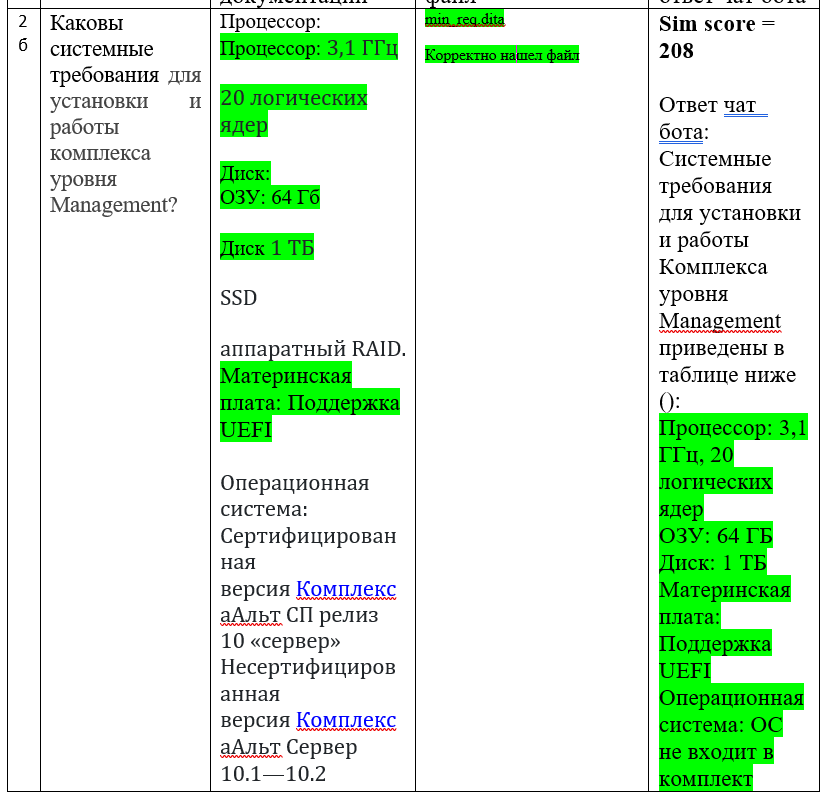

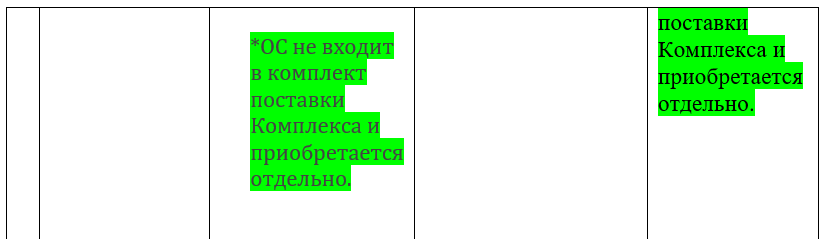

Код Данила Ашиева:

In [ ]:
pip install rouge_score

In [ ]:
from rouge_score import rouge_scorer

# Initialize the scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Reference and candidate summaries
reference = "Ссылка на корпоративный ТГ-канал УЦСБ: https://t.me/+Ccat7WcyfM9iN2Yy"
candidate = "В корпоративном ТГ-канале @USSC_ltd (https://t.me/+Ccat7WcyfM9iN2Yy) мы публикуем самые срочные и важные новости: письма от директоров, информацию о ДМС, анонсы мероприятий и т.д."

# Calculate scores
scores = scorer.score(reference, candidate)
print(scores)

{'rouge1': Score(precision=0.6666666666666666, recall=1.0, fmeasure=0.8), 'rouge2': Score(precision=0.6, recall=1.0, fmeasure=0.7499999999999999), 'rougeL': Score(precision=0.6666666666666666, recall=1.0, fmeasure=0.8)}


In [ ]:
from rouge_score import rouge_scorer

# Initialize the scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Reference and candidate summaries
reference = "Причина: Отсутствие переменных SIEM_SYSLOG_HOST и ITMM_IP_ADDRESS в файле .env при включенной интеграции с SIEM"
candidate = "Причина: Контейнер itm_m_siem_connector может перезапускаться из-за отсутствия необходимых переменных окружения и в файле .env при включенной интеграции с SIEM. Для устранения этой проблемы необходимо проверить наличие этих переменных в файле .env и убедиться, что они правильно настроены."

# Calculate scores
scores = scorer.score(reference, candidate)
print(scores)

{'rouge1': Score(precision=0.42857142857142855, recall=0.375, fmeasure=0.39999999999999997), 'rouge2': Score(precision=0.16666666666666666, recall=0.14285714285714285, fmeasure=0.15384615384615383), 'rougeL': Score(precision=0.42857142857142855, recall=0.375, fmeasure=0.39999999999999997)}


https://habr.com/ru/articles/811239/

https://github.com/dmitrymailk/text_evaluation/blob/master/text_evaluation.ipynb

https://dev.to/aws-builders/mastering-rouge-matrix-your-guide-to-large-language-model-evaluation-for-summarization-with-examples-jjg

https://under-sky-ai.ru/post/mashinnyiy_perevod_i_avtomaticheskoe_referirovanie_metrik_otsenki_bleu_i_rouge